In [ ]:
# %pip install --upgrade --user xarray matplotlib numpy seaborn pandas pyarrow

In [2]:
import xarray as xr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Spike Count Analysis with Numpy and Matplotlib

In this notebook, we will be focusing on the spiking actvitiy of neurons from the [Steinmetz et al, 2019 paper](https://www.nature.com/articles/s41586-019-1787-x). With the rich dataset that they collected during their experiments many analyses are possible that can link neural activity to behavioral or experimental variables. 

##### Analysis Goals
In this notebook, we'll be exploring the spike counts data recorded during a specific session and investigate differences between brain regions and their relation to behavioral, task, or performance variables.

##### Learning Goals
We will be using the Xarray Python package to load the data which is stored in netCDF format (i.e. `.nc` extension), as well as Numpy and Matplotlib to analyze and visualize the spiking activity.

---

### Download the dataset

In [3]:
# Add path with self-created packages and import them
import sys
sys.path.append('../src')
import sciebo

# Download data
sciebo.download_file('https://uni-bonn.sciebo.de/s/YT3iaH9Po0LJMxR', f'data/steinmetz_2017-12-05_Lederberg.nc')

### Load the dataset using Xarray

In [3]:
dset = xr.load_dataset(f"./data/steinmetz_2017-12-05_Lederberg.nc")
dset

<xarray.Dataset>
Dimensions:             (trial: 340, time: 250, cell: 698,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 12, spike_id: 3185888)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 335 336 337 338 339 340
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 693 694 695 696 697 698
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) <U5 'DG' 'LGd' 'SUB' ... 'MD' 'VISam'
  * spike_id            (spike_id) int32 1 2 3 4 ... 3185886 3185887 3185888
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 0 0 0 100 25 50 0 0 100 ... 0 0 0 0 0 0 0 0
    contrast_right      (trial) int8 0 0 0 50 50 50 ... 100 100 100 100 100 100
    gocue               (trial) float64 0.4884 0.5617 0.6277 ... 0.7894 0.7892
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 -1.0 1.0 1.0 ... -1.0 -1.0 -1.0 -1.0
    feedback_time       (trial) float64 2.028 0.9821 2.175 ... 2.181 2.331 2.316
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... 0....
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... -0....
    lfp                 (brain_area_lfp, trial, time) float64 -57.29 ... -15.9
    spike_time          (spike_id) float32 0.01967 0.09227 ... 2.355 2.475
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 698 698 698 698 698
    spike_trial         (spike_id) uint32 1 1 1 1 1 1 ... 450 450 450 450 450

---

## Spike Count Analysis Across Brain Regions

Different areas in the brain are commonly believed to specialize in specific aspects of behavior or task. This makes analyzing spiking activity across brain regions an essential step in many neuroscience data analysis pipelines. Over the next couple of exercises let's focus on how the spike counts of neurons differ across different brain regions.

**xarray**
| **Code**                         | **Description**                                                                                                          |
|----------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| `var_name = dset["var_name"].to_numpy()` | Extracts the data associated with `var_name` from an `xarray` dataset and converts it to a NumPy array.                 |
| `dset["var_name"].dims`          | Retrieves the dimensions associated with the variable `var_name` in an `xarray` dataset.                                |

**Numpy**
| **Code**                         | **Description**                                                                                                          |
|----------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| `np.unique()`                    | Finds the unique elements of an array. To use, pass an array as an argument, like `np.unique(var_name)`.                |
| `var_name == specific_value`   | Creates a boolean array where each element is `True` if the corresponding element in `var_name` equals `specific_value`; otherwise `False`. |
| `var_name[bool_array]`        | Uses a boolean array to filter elements of `var_name`, selecting only those that correspond to `True` in the boolean array. |
| `var_name.mean(axis=0)`  | Compute the mean across the first dimension, i.e. across rows. |

**Matplotlib**
| **Code**                         | **Description**                                                                                                          |
|----------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| `plt.figure()`                   | Creates a new figure for plotting with `matplotlib`. Optional arguments include `figsize=(width, height)` for size.      |
| `plt.imshow()`                   | Displays an image (or data treated as an image), useful for visualizing 2D arrays.                          |
| `plt.xlabel()`                   | Adds a label to the x-axis of the plot.                                                                                  |
| `plt.ylabel()`                   | Adds a label to the y-axis of the plot.                                                                                  |
| `plt.colorbar()`                 | Adds a colorbar to a plot, useful for showing the scale of colors in `plt.imshow()` and other image plots.               |

**Example**: Load the `spike_count` data from the Xarray dataset, and check the shape of it (how many elements are in each dimension?)

In [4]:
spike_counts = dset["spike_count"].to_numpy()
spike_counts.shape

(698, 340, 250)

**Example**: What does each dimension correspond to?

In [5]:
dset["spike_count"].dims

('cell', 'trial', 'time')

Load the `brain_groups` data from the Xarray dataset, and check its shape. `brain_groups` contains the brain area information for each neuron.

In [6]:
brain_area = dset["brain_groups"].to_numpy()
brain_area.shape

(698,)

What does each dimension of the `brain_groups` correspond to?

In [7]:
dset["brain_groups"].dims

('cell',)

Which brain areas were recorded in this dataset?

In [8]:
np.unique(brain_area)

array(['hippocampus', 'non-visual cortex', 'root', 'thalamus',
       'visual cortex'], dtype='<U17')

**Example**: What is the total number of neurons recorded from the `visual cortex`?

In [9]:
np.sum(brain_area == 'visual cortex')


145

What is the total number of neurons recorded from `thalamus`?

In [10]:
np.sum(brain_area == 'thalamus')


155

What is the total number of neurons recorded from `hippocampus`?

In [11]:
np.sum(brain_area == 'hippocampus')


220

**Example**: Compute the population spike count (i.e. average spike count across all neurons) for neurons in `thalamus`, and visualize it using the `plt.imshow()` plotting function. 

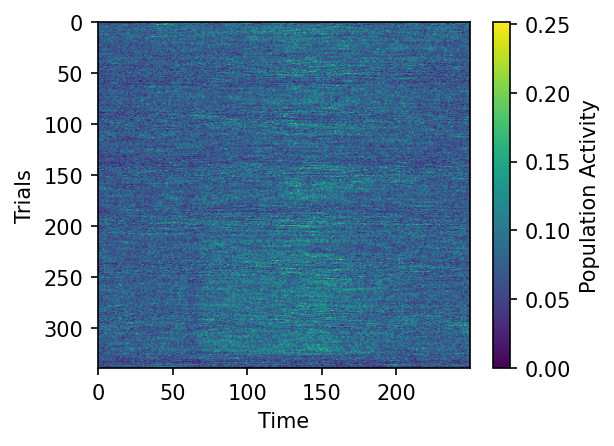

In [12]:
region_mask = (brain_area == 'thalamus')
region_spike_counts = spike_counts[region_mask]
population_activity = region_spike_counts.mean(axis=0)

plt.figure(figsize=(4, 3), dpi=150)
plt.imshow(population_activity, aspect='auto', cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Trials')
plt.colorbar(label="Population Activity")

Compute the population spike count (i.e. average spike count across all neurons) for neurons in `visual cortex`, and visualize it. 

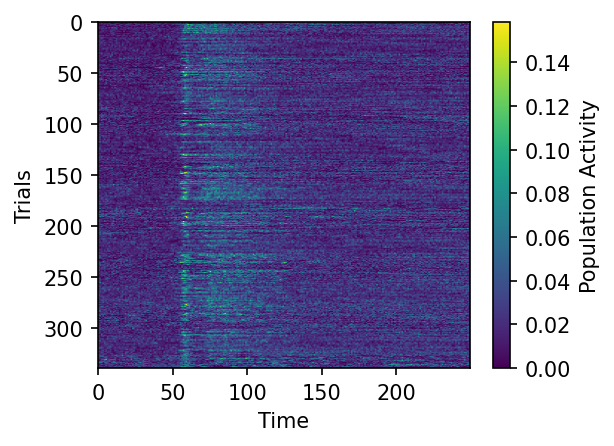

In [13]:
region_mask = (brain_area == 'visual cortex')
region_spike_counts = spike_counts[region_mask]
population_activity = region_spike_counts.mean(axis=0)

plt.figure(figsize=(4, 3), dpi=150)
plt.imshow(population_activity, aspect='auto', cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Trials')
plt.colorbar(label="Population Activity")

Compute the population spike count (i.e. average spike count across all neurons) for neurons in `hippocampus`, and visualize it. 

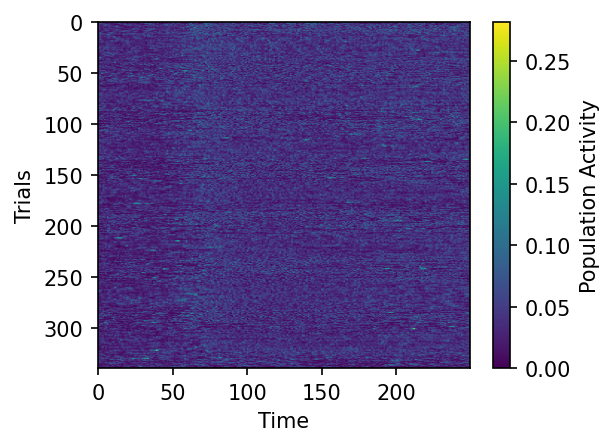

In [14]:
region_mask = (brain_area == 'hippocampus')
region_spike_counts = spike_counts[region_mask]
population_activity = region_spike_counts.mean(axis=0)

plt.figure(figsize=(4, 3), dpi=150)
plt.imshow(population_activity, aspect='auto', cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Trials')
plt.colorbar(label="Population Activity")

---

## Spiking Counts vs. Behavioral Variables

In addition to brain area, we also have access to several behavioral variables such as:
- **wheel speed**: the speed at which the subject turned the wheel to report their decision
- **face energy**: a measure of the amount of movement in the subject's face
- **pupil area**: the area of the pupil, aka pupil dilation.
 
Over the next few exercises, we'll use Numpy and Matplotlib to investigate whether there is any relationship between the spiking activity and the behavioral variables.


**Numpy**
| **Code**                        | **Description**                                                                                                          |
|---------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| `var_name.mean(axis=1)`         | Compute the mean across the second dimension, i.e. across columns. |
| `var_name.mean(axis=(0, 1))`    | Calculates the mean of `var_name` across the specified axes (0 and 1), effectively reducing the array's dimensionality by averaging over those axes. |
| `var_name.mean(axis=(0, 2))`    | Similar to the above, it calculates the mean across axes 0 and 2. This is useful for multidimensional arrays where you want to average across specific dimensions. |
| `np.abs()`                      | Calculates the absolute value of each element in an array. To use, pass an array as an argument, like `np.abs(var_name)`. |
| `np.corrcoef()`                 | Calculates the correlation coefficients between rows or columns of an array, indicating the degree of linear relationship between variables. Pass two arrays as arguments to get their correlation, e.g., `np.corrcoef(data1, data2)`. |

**Matplotlib**
| **Code**                        | **Description**                                                                                                          |
|---------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| `plt.scatter(data1, data2)`     | Creates a scatter plot with `data1` on the x-axis and `data2` on the y-axis. This is useful for visualizing the relationship between two datasets. |

**Example**: Compute the neural activity averaged over neurons and time. This would result in a single value per trial representing the population activity in a given trial.

Steps:
- Load the spike count data as a numpy array
- Compute the average spike count across neurons and time dimensions
- Check the shape to make sure we are only left with the trial dimension

In [88]:
spike_counts = dset["spike_count"].to_numpy()
pop_act_single_trial = spike_counts.mean(axis=(0, 2)) # first dimension (axis=0) is neurons and the third dimension (axis=2) is time
pop_act_single_trial.shape

(340,)

Compute the wheel speed averaged over time. This would result in a single value per trial representing the average wheel speed in a given trial.

Steps:
- Load the wheel speed from the dataset as a numpy array
- Compute the average wheel speed across time dimension 
- Check the shape to make sure we are only left with the trial dimension.

In [90]:
wheel_speed = dset["wheel"].to_numpy()
wheel_speed_avg = wheel_speed.mean(axis=1) # second dimension (axis=1) is time
wheel_speed_avg.shape

(340,)

**Example**: Using a scatter plot, compare average population spike count vs average wheel speed, across trials.

Text(0, 0.5, 'Population Activity')

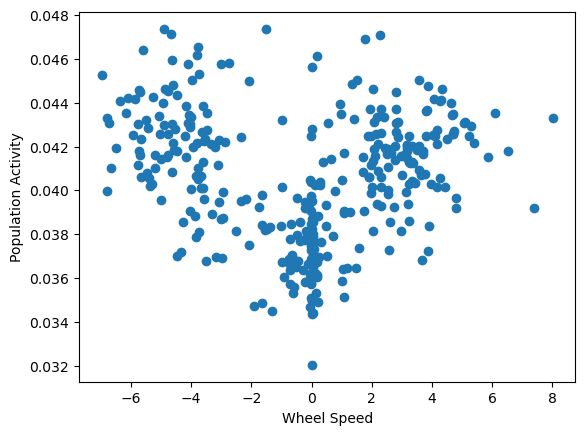

In [91]:
plt.scatter(wheel_speed_avg, pop_act_single_trial)
plt.xlabel("Wheel Speed")
plt.ylabel("Population Activity")

**Note** that wheel speed seem to have negative values. Redo the plot only considering the magnitude of wheel speed.

Text(0, 0.5, 'Population Activity')

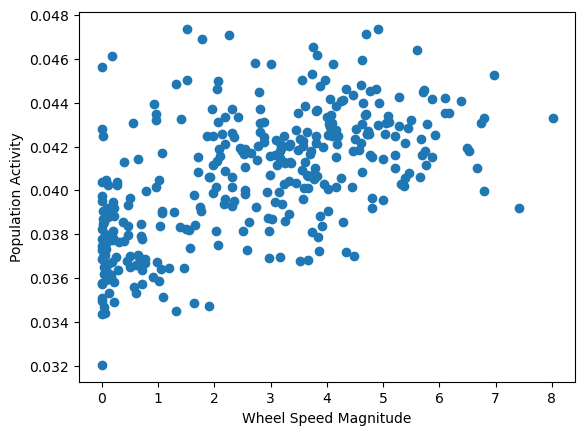

In [92]:
plt.scatter(np.abs(wheel_speed_avg), pop_act_single_trial)
plt.xlabel("Wheel Speed Magnitude")
plt.ylabel("Population Activity")

Using a scatter plot, compare the average population spike count vs average face energy (variable name in the dataset is `face`).

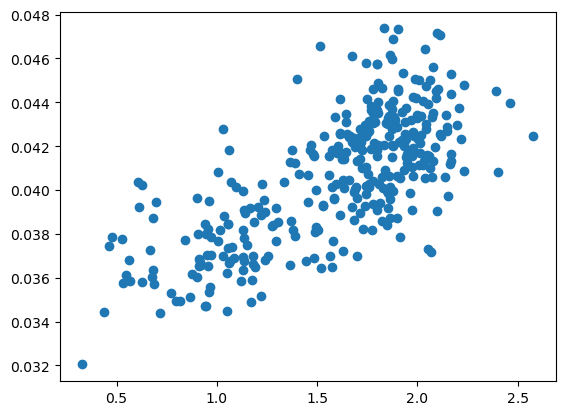

In [93]:
face_energy = dset["face"].to_numpy()
face_energy_avg = face_energy.mean(axis=1) # second dimension (axis=1) is time
face_energy_avg.shape

plt.scatter(face_energy_avg, spike_counts.mean(axis=(0, 2)))

Using a scatter plot, compare the average population spike count vs pupil area.

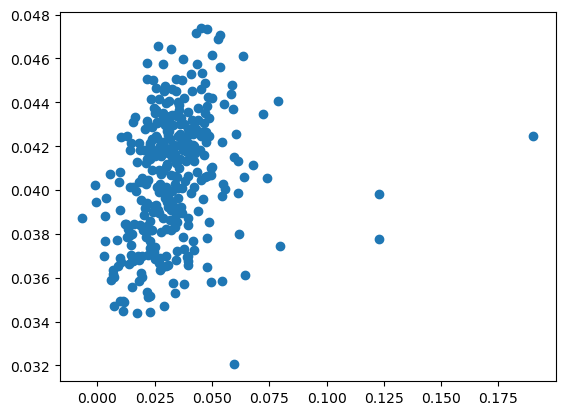

In [95]:
pupil_area = dset["pupil_area"].to_numpy()
pupil_area_avg = pupil_area.mean(axis=1) # second dimension (axis=1) is time
pupil_area_avg.shape

plt.scatter(pupil_area_avg, spike_counts.mean(axis=(0, 2)))

Use a numpy function to compute the correlation between average population spike count and average pupil area.

In [96]:
np.corrcoef(pupil_area_avg, pop_act_single_trial)[0, 1]

0.2662843552504508

Which behavioral variable (wheel speed vs face energy vs pupil area) is more correlated with the average population activity?

In [54]:
np.corrcoef(np.abs(wheel_speed_avg), pop_act_single_trial)[0, 1]

0.5668226259814416

In [73]:
np.corrcoef(face_energy_avg, pop_act_single_trial)[0, 1]

0.7125172696082792

In [58]:
np.corrcoef(pupil_area_avg, pop_act_single_trial)[0, 1]

0.2662843552504508

**Example** Which brean area between visual cortex and thalamus has a higher correlation with pupil area?

In [78]:
brain_area = dset["brain_groups"].to_numpy()

In [79]:
brain_area_mask = brain_area == "visual cortex"
vs_pop_act_single_trial = spike_counts[brain_area_mask].mean(axis=(0, 2)) # first dimension (axis=0) is neurons and the third dimension (axis=2) is time
np.corrcoef(pupil_area_avg, vs_pop_act_single_trial)[0, 1]

0.3249717213974791

In [80]:
brain_area_mask = brain_area == "thalamus"
th_pop_act_single_trial = spike_counts[brain_area_mask].mean(axis=(0, 2)) # first dimension (axis=0) is neurons and the third dimension (axis=2) is time
np.corrcoef(pupil_area_avg, th_pop_act_single_trial)[0, 1]

-0.16405424820428974

**Discussion**: What do you make of the correlation values?

Which brean area has a higher correlation with face energy?

In [81]:
np.corrcoef(face_energy_avg, vs_pop_act_single_trial)[0, 1]

0.6018167010960438

In [82]:
np.corrcoef(face_energy_avg, th_pop_act_single_trial)[0, 1]

0.44977304835675636

---

## Spiking Counts vs. Task and Performance Variables

The steinmetz data also contains all the variables that relate to the task or the performance of the subject, including response type and stimulus contrast level. Let's investigate whether the pattern of neural activity would change for different values of these categorical variables. 

**Matplotlib**
| **Code**                | **Description**                                                                                                          |
|-------------------------|--------------------------------------------------------------------------------------------------------------------------|
| `plt.plot(x, y)`            | Plots y versus x as a line. It's highly versatile, allowing for a wide range of line styles, marker types, and configurations. |
| `plt.legend()`          | Adds a legend to the plot. You can specify the label for a specific line by setting the `label` argument in the `plt.plot()` function, e.g. `plt.plot(x, y, label="data1"`) |


**Example** How does the average neural activity look like for trials with `response_type=1` (subject turned the wheel right).

Here are the steps:
- Load the `"spike_count"` variable as a numpy array and take the average across neurons to get the population activity
- Load the `"response_type"` variable as a numpy array
- Use the response type to select trials where `response_type=1` and compute the average across trials
- Plot the trial-averaged response when `response_type=1`

In [61]:
spike_counts = dset["spike_count"].to_numpy()
pop_act = spike_counts.mean(axis=0) # first dimension (axis=0) is neurons and the third dimension (axis=2) is time

response_type = dset["response_type"].to_numpy()

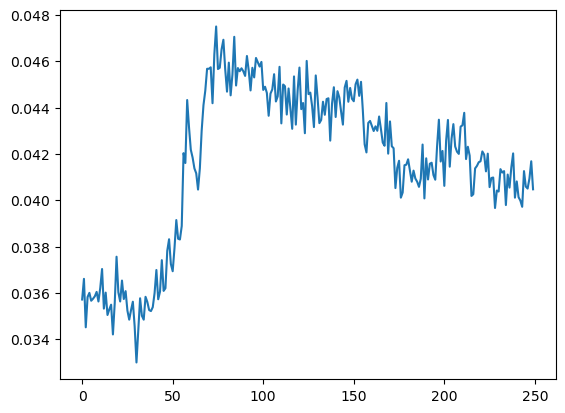

In [62]:
plt.plot(pop_act[response_type==1, :].mean(axis=0))

How does the average neural activity look like for trials with `response_type=-1` (subject turned the wheel left).

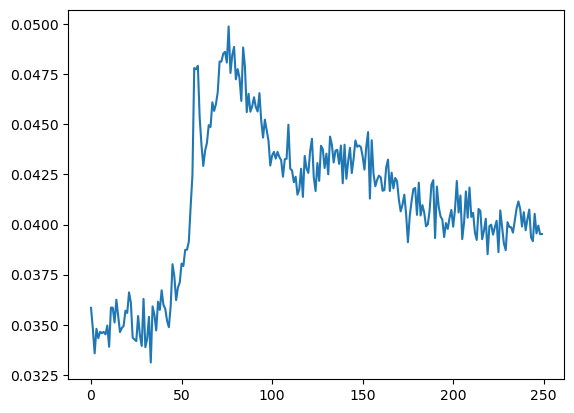

In [60]:
plt.plot(pop_act[response_type==-1, :].mean(axis=0))

How does the average neural activity look like for trials with `response_type=0` (subject did not turn the wheel).

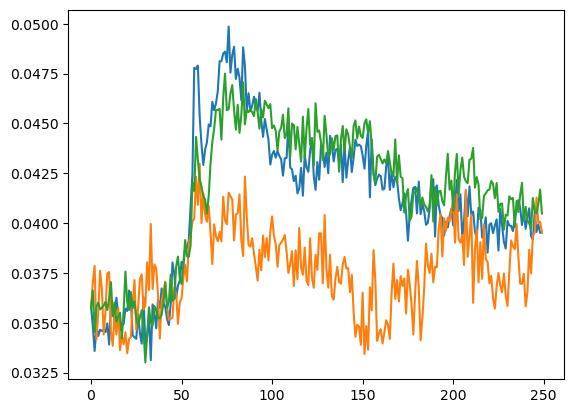

In [40]:
plt.plot(pop_act[response_type==0, :].mean(axis=0))

**Example**: To get a better sense of the difference of trial-averaged activity for different values of `response_type`, plot all of them in the same plot. Add a legend to show which line corresponds to which response type.

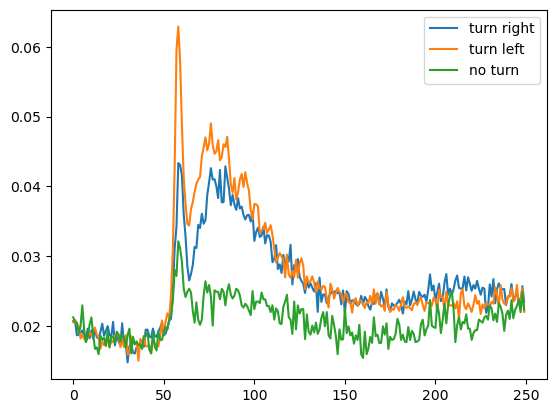

In [82]:
plt.plot(pop_act[response_type==1, :].mean(axis=0), label="turn right")
plt.plot(pop_act[response_type==-1, :].mean(axis=0), label="turn left")
plt.plot(pop_act[response_type==0, :].mean(axis=0), label="no turn")

plt.legend()

How does the trial-averaged neural activity look like for different values of `feedback_type` (when the subject was rewarded or not).

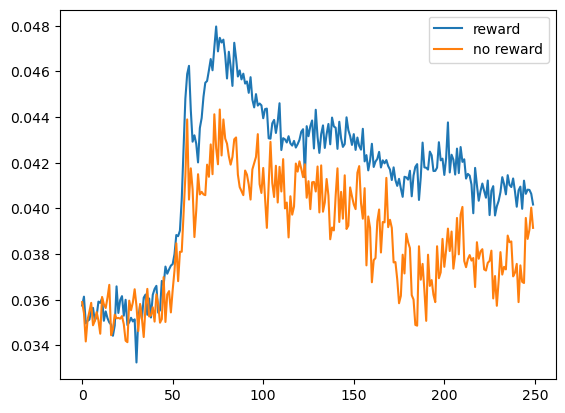

In [69]:
feedback_type = dset["feedback_type"].to_numpy()

plt.plot(pop_act[feedback_type==1, :].mean(axis=0), label="reward")
plt.plot(pop_act[feedback_type==-1, :].mean(axis=0), label="no reward")

plt.legend()

How does the trial-averaged neural activity look like for different values of `contrast_left` (when the subject was rewarded or not).

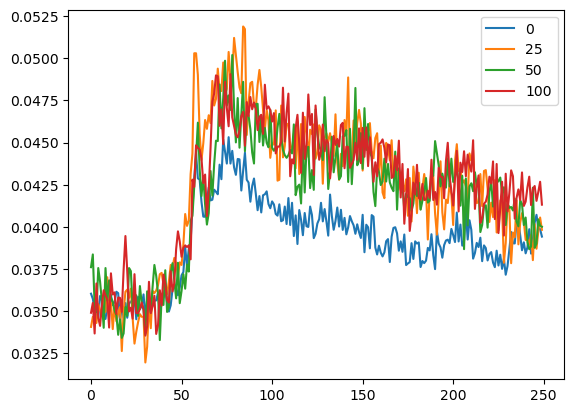

In [77]:
contrast_left = dset["contrast_left"].to_numpy()
plt.plot(pop_act[contrast_left==0, :].mean(axis=0), label="0")
plt.plot(pop_act[contrast_left==25, :].mean(axis=0), label="25")
plt.plot(pop_act[contrast_left==50, :].mean(axis=0), label="50")
plt.plot(pop_act[contrast_left==100, :].mean(axis=0), label="100")

plt.legend()

**Example**: How does the trial-averaged response looks like for neurons in visual cortex when `response_type=1`?

In [79]:
brain_areas = dset["brain_groups"].to_numpy()

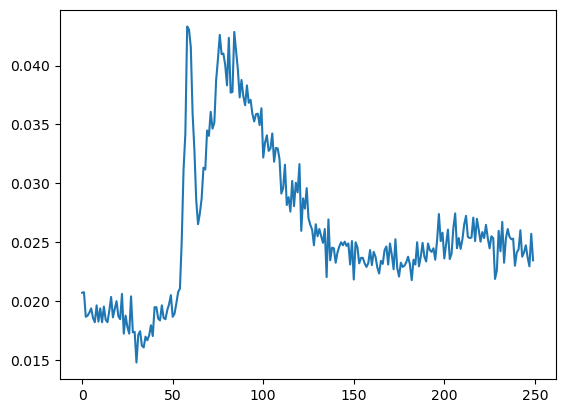

In [81]:
region_mask = brain_areas == "visual cortex"
pop_act = spike_counts[region_mask].mean(axis=0)

plt.plot(pop_act[response_type==1, :].mean(axis=0))

How does the trial-averaged response looks like for neurons in visual cortex for all values of `response_type`?

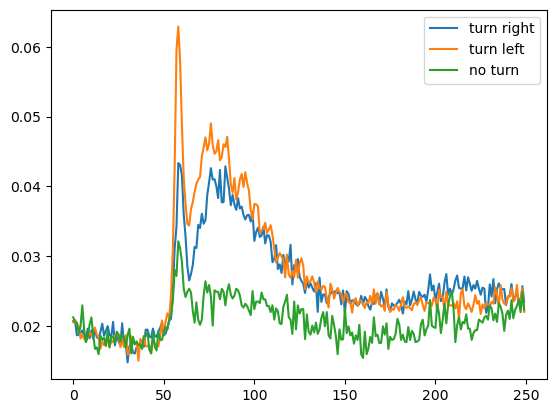

In [83]:
plt.plot(pop_act[response_type==1, :].mean(axis=0), label="turn right")
plt.plot(pop_act[response_type==-1, :].mean(axis=0), label="turn left")
plt.plot(pop_act[response_type==0, :].mean(axis=0), label="no turn")

plt.legend()

How does the trial-averaged response looks like for neurons in thalamus for all values of `response_type`?

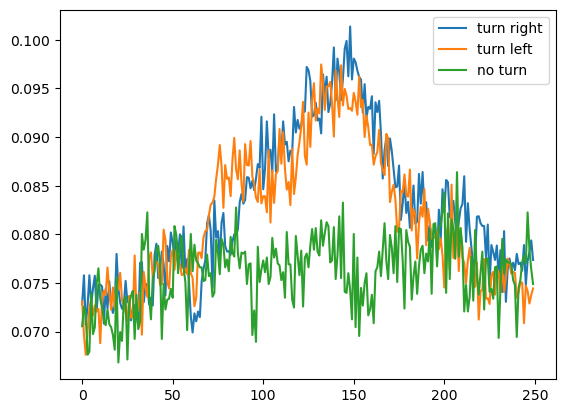

In [84]:
region_mask = brain_areas == "thalamus"
pop_act = spike_counts[region_mask].mean(axis=0)

plt.plot(pop_act[response_type==1, :].mean(axis=0), label="turn right")
plt.plot(pop_act[response_type==-1, :].mean(axis=0), label="turn left")
plt.plot(pop_act[response_type==0, :].mean(axis=0), label="no turn")

plt.legend()

How does the trial-averaged response looks like for neurons in thalamus for all values of `feedback_type`?

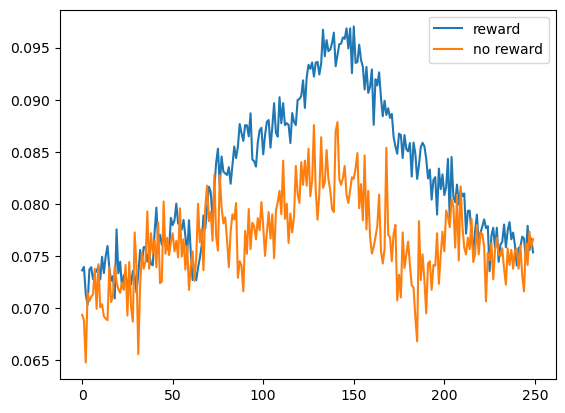

In [86]:
region_mask = brain_areas == "thalamus"
pop_act = spike_counts[region_mask].mean(axis=0)

plt.plot(pop_act[feedback_type==1, :].mean(axis=0), label="reward")
plt.plot(pop_act[feedback_type==-1, :].mean(axis=0), label="no reward")

plt.legend()

---

## Putting Multiple Results in a Single Figure: Subplots

Figures in research papers often contain multiple plots. In matplotlib, these single plots are called subplots. To create subplots using matplotlib, we first create a figure using `plt.figure()` and then create subplots as part of the figure using the `plt.subplot()`. Here is an example of a figure with three subplots places beside each other (i.e. a single row):

<br>

```python
plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1) # creates a single subplot located as the first subplot in a grid of subplots with 1 row and 3 columns
# plotting code

plt.subplot(1, 3, 2) # creates a single subplot located as the second subplot
# plotting code

plt.subplot(1, 3, 3) # creates a single subplot located as the third subplot
# plotting code
```

<br>

Under each subplot, we can simply use matplotlib plotting function, and the result will be displayed in the corresponding subplot.

**Example**: Create a figure with three subplots where each subplot shows the trial-averaged response for all values of `feedback_type`. Each subplot is for a specific brain region 
- left subplot: visual cortex
- middle subplot: thalamus
- right subplot: hippocampus

Text(0.5, 1.0, 'Hippocampus')

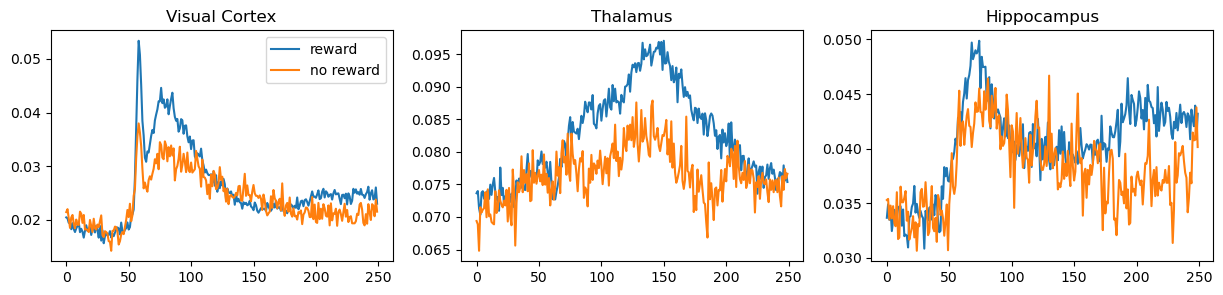

In [114]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
region_mask = brain_areas == "visual cortex"
pop_act = spike_counts[region_mask].mean(axis=0)
plt.plot(pop_act[feedback_type==1, :].mean(axis=0), label="reward")
plt.plot(pop_act[feedback_type==-1, :].mean(axis=0), label="no reward")
plt.legend()
plt.title("Visual Cortex")

plt.subplot(1, 3, 2)
region_mask = brain_areas == "thalamus"
pop_act = spike_counts[region_mask].mean(axis=0)
plt.plot(pop_act[feedback_type==1, :].mean(axis=0))
plt.plot(pop_act[feedback_type==-1, :].mean(axis=0))
plt.title("Thalamus")

plt.subplot(1, 3, 3)
region_mask = brain_areas == "hippocampus"
pop_act = spike_counts[region_mask].mean(axis=0)
plt.plot(pop_act[feedback_type==1, :].mean(axis=0))
plt.plot(pop_act[feedback_type==-1, :].mean(axis=0))
plt.title("Hippocampus")

Create a figure with three subplots where each subplot shows the trial-averaged response for all values of `response_type`. Each subplot is for a specific brain region 
- left subplot: visual cortex
- middle subplot: thalamus
- right subplot: hippocampus

Text(0.5, 1.0, 'Hippocampus')

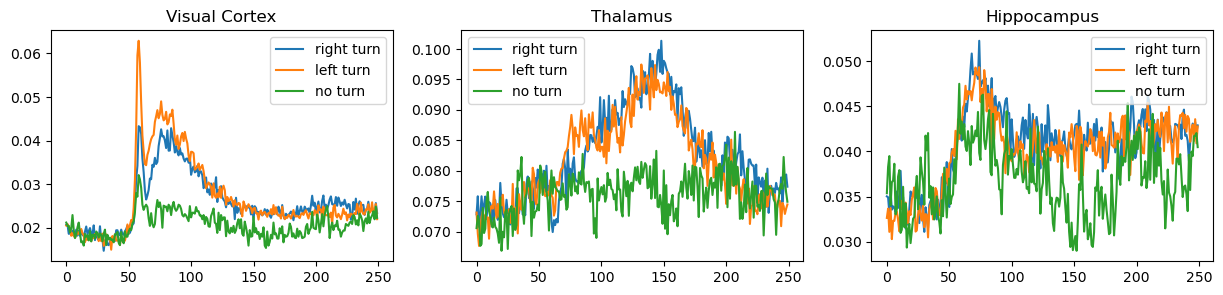

In [116]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
region_mask = brain_areas == "visual cortex"
pop_act = spike_counts[region_mask].mean(axis=0)
plt.plot(pop_act[response_type==1, :].mean(axis=0), label="right turn")
plt.plot(pop_act[response_type==-1, :].mean(axis=0), label="left turn")
plt.plot(pop_act[response_type==0, :].mean(axis=0), label="no turn")
plt.legend()
plt.title("Visual Cortex")

plt.subplot(1, 3, 2)
region_mask = brain_areas == "thalamus"
pop_act = spike_counts[region_mask].mean(axis=0)
plt.plot(pop_act[response_type==1, :].mean(axis=0), label="right turn")
plt.plot(pop_act[response_type==-1, :].mean(axis=0), label="left turn")
plt.plot(pop_act[response_type==0, :].mean(axis=0), label="no turn")
plt.legend()
plt.title("Thalamus")

plt.subplot(1, 3, 3)
region_mask = brain_areas == "hippocampus"
pop_act = spike_counts[region_mask].mean(axis=0)
plt.plot(pop_act[response_type==1, :].mean(axis=0), label="right turn")
plt.plot(pop_act[response_type==-1, :].mean(axis=0), label="left turn")
plt.plot(pop_act[response_type==0, :].mean(axis=0), label="no turn")
plt.legend()
plt.title("Hippocampus")

Create a figure with three subplots where each subplot is a scatter plot comparing the average population spike count vs a specific behavioral variable:
- left subplot: wheel speed
- middle subplot: face energy
- right subplot: pupil area

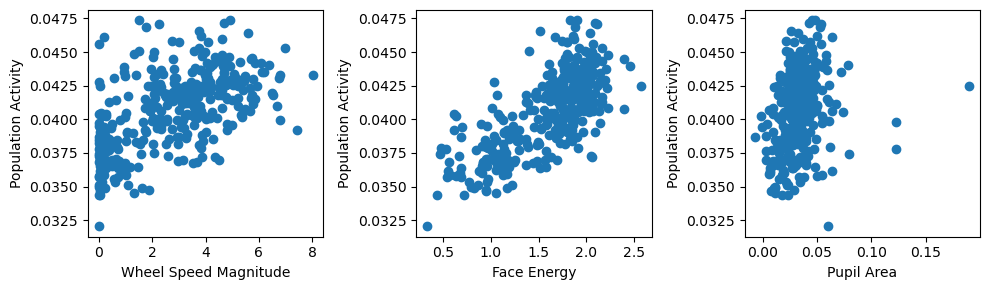

In [117]:
spike_counts = dset["spike_count"].to_numpy()
pop_act_single_trial = spike_counts.mean(axis=(0, 2))

plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
wheel_speed = dset["wheel"].to_numpy()
wheel_speed_avg = wheel_speed.mean(axis=1)
plt.scatter(np.abs(wheel_speed_avg), pop_act_single_trial)
plt.xlabel("Wheel Speed Magnitude")
plt.ylabel("Population Activity")

plt.subplot(1, 3, 2)
face_energy = dset["face"].to_numpy()
face_energy_avg = face_energy.mean(axis=1)
plt.scatter(face_energy_avg, spike_counts.mean(axis=(0, 2)))
plt.xlabel("Face Energy")
plt.ylabel("Population Activity")

plt.subplot(1, 3, 3)
pupil_area = dset["pupil_area"].to_numpy()
pupil_area_avg = pupil_area.mean(axis=1)
plt.scatter(pupil_area_avg, spike_counts.mean(axis=(0, 2)))
plt.xlabel("Pupil Area")
plt.ylabel("Population Activity")

plt.tight_layout()

Do the same figure but instead having the subplots in a single row, arrange them in a single column.

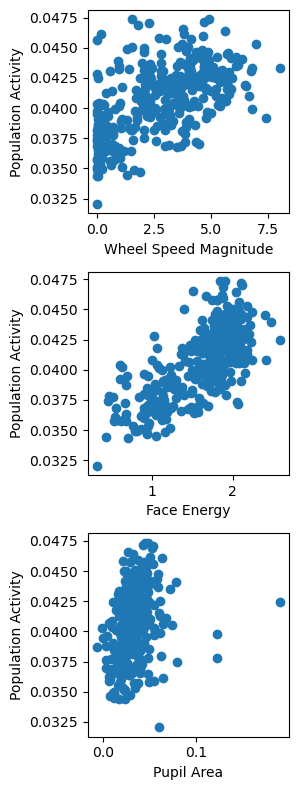

In [121]:
spike_counts = dset["spike_count"].to_numpy()
pop_act_single_trial = spike_counts.mean(axis=(0, 2))

plt.figure(figsize=(3, 8))

plt.subplot(3, 1, 1)
wheel_speed = dset["wheel"].to_numpy()
wheel_speed_avg = wheel_speed.mean(axis=1)
plt.scatter(np.abs(wheel_speed_avg), pop_act_single_trial)
plt.xlabel("Wheel Speed Magnitude")
plt.ylabel("Population Activity")

plt.subplot(3, 1, 2)
face_energy = dset["face"].to_numpy()
face_energy_avg = face_energy.mean(axis=1)
plt.scatter(face_energy_avg, spike_counts.mean(axis=(0, 2)))
plt.xlabel("Face Energy")
plt.ylabel("Population Activity")

plt.subplot(3, 1, 3)
pupil_area = dset["pupil_area"].to_numpy()
pupil_area_avg = pupil_area.mean(axis=1)
plt.scatter(pupil_area_avg, spike_counts.mean(axis=(0, 2)))
plt.xlabel("Pupil Area")
plt.ylabel("Population Activity")

plt.tight_layout()